In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [64]:
raw_data = pd.read_csv("Breast_GSE45827.csv")
metadata = raw_data[['samples', 'type']]
data = raw_data.drop(['samples', 'type'], axis = 1)

top_50_genes = pd.read_csv('top_50_genes.csv')
top50_data = raw_data[top_50_genes['Gene']]

metadata['type'] = ['Healthy' if x == 'normal' else 'Breast Cancer' for x in metadata['type']]

C:\Users\itani\AppData\Local\Temp\ipykernel_32480\1047760207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = ['Healthy' if x == 'normal' else 'Breast Cancer' for x in metadata['type']]


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()
metadata['type'] = label_encoder.fit_transform(metadata['type'])

C:\Users\itani\AppData\Local\Temp\ipykernel_32480\2771626634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = label_encoder.fit_transform(metadata['type'])


In [68]:

X = top50_data.values  # Feature data (top 50 genes)
y = metadata['type'].values  # Labels (Healthy or Breast Cancer)

In [57]:

svm = SVC(kernel='linear', C=1.0, gamma='scale')  # You can adjust C and gamma for tuning
svm.fit(X, y)  # Train on all data

y_pred = svm.predict(X)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00         7

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151

Confusion Matrix:
 [[144   0]
 [  0   7]]


In [58]:
# Access the weight vector (w) and the bias term (b)
w = svm.coef_[0]  # Weight vector (for linear SVM)
b = svm.intercept_[0]  # Bias term (intercept)

In [69]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fit the SVM model
svm = SVC(kernel='linear', C=1.0, gamma='scale')
svm.fit(X, y)

# Perform PCA to reduce the data to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
z_min, z_max = X_pca[:, 2].min() - 1, X_pca[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

# Flatten the grid to pass into the model
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict using the trained SVM model (to get the decision function)
Z = svm.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# Plotting the 3D scatter plot and decision surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA-transformed data
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', marker='o')

# Plot decision boundary using the contour plot
# Z will give the "level" of decision surface, and we'll create a surface plot.
ax.contourf(xx, yy, zz, Z, 50, cmap='coolwarm', alpha=0.3)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA with SVM Decision Boundary')

# Show the color bar for class labels
fig.colorbar(scatter)

plt.show()

# Make predictions on the data
y_pred = svm.predict(X)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


ValueError: X has 3 features, but SVC is expecting 50 features as input.

In [70]:
X

array([[ 8.71240319,  8.07051944,  5.18552252, ...,  6.26980742,
         8.15645072,  9.2766337 ],
       [ 8.24745868,  8.6011471 ,  5.68538562, ...,  6.96189257,
         7.40887614,  9.41586234],
       [ 9.58117029,  8.31681186,  5.56991517, ...,  6.83726121,
         8.56739591,  8.50052665],
       ...,
       [ 7.96704421, 10.3720133 ,  6.5586102 , ...,  5.46262966,
         9.62059403,  6.08260133],
       [ 7.69539584, 10.14162251,  6.69845235, ...,  4.44365081,
         8.40510424,  7.15524949],
       [ 8.52171265,  9.96173137,  6.66558194, ...,  4.53151122,
         9.39530888,  8.08924609]])

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming raw_data and metadata are already defined

# Standardize the data and apply log transformation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log(1 + raw_data))  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a color mapping based on disease stage
unique_types = metadata['type'].unique()
types = ['Healthy' if x == 'normal' else 'Breast Cancer' for x in metadata['type']]

# Define a colormap based on disease stages
cmap = plt.get_cmap('bwr', len(unique_types))

# Convert 'Healthy' and 'Ill' to numerical codes for coloring
type_codes = [0 if t == 'Healthy' else 1 for t in types]

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=type_codes, cmap=cmap, alpha=0.7)

# Step 4: Create the legend based on the disease stages
# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Ill')
]

# Step 5: Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Healthy vs Disease PCA')

# Add the legend
ax.legend(handles=handles, title="Disease Stages")

# Step 7: Show the plot
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

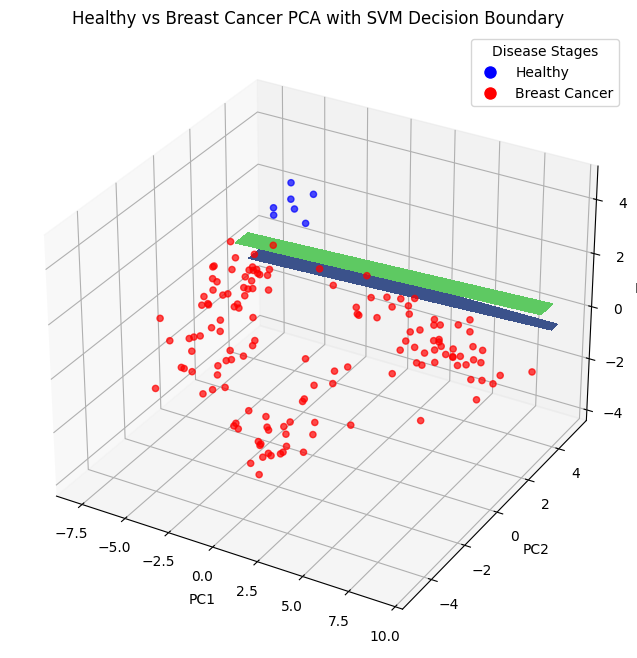

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming raw_data, metadata, and svm are already defined

# Standardize the data and apply log transformation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top50_data)  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create type labels (Healthy = 0, Breast Cancer = 1)
type_codes = [0 if t == 'Healthy' else 1 for t in metadata['type']]

# Train the SVM model (Soft SVM)
svm = SVC(kernel='linear', C=1.0, gamma='scale')
svm.fit(pca_result, type_codes)

# Get the SVM decision boundary
xx, yy = np.meshgrid(np.linspace(pca_result[:, 0].min(), pca_result[:, 0].max(), 50),
                     np.linspace(pca_result[:, 1].min(), pca_result[:, 1].max(), 50))

# Create a grid for prediction
grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]  # Add z=0 initially (you can adjust this)

# Predict decision values for the grid points
Z = svm.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the SVM decision boundary (plane)
ax.contourf(xx, yy, Z, levels=[-1, 0, 1])

# Scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=type_codes, cmap='bwr', alpha=0.7)

# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Breast Cancer')
]

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Healthy vs Breast Cancer PCA with SVM Decision Boundary')

# Add the legend
ax.legend(handles=handles, title="Disease Stages")

# Show the plot
plt.show()


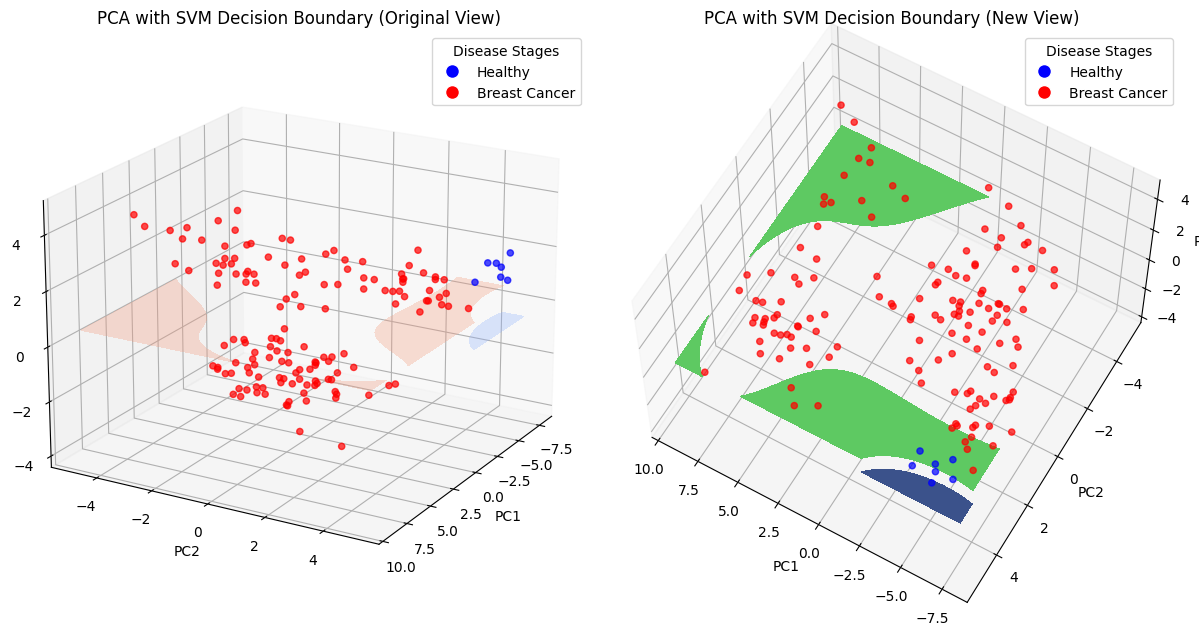

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming raw_data, metadata, and svm are already defined

# Standardize the data and apply log transformation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top50_data)  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create type labels (Healthy = 0, Breast Cancer = 1)
type_codes = [0 if t == 'Healthy' else 1 for t in metadata['type']]

# Train the SVM model (Soft SVM)
svm = SVC(kernel='rbf', C=2, gamma='scale')
svm.fit(pca_result, type_codes)

# Get the SVM decision boundary
xx, yy = np.meshgrid(np.linspace(pca_result[:, 0].min(), pca_result[:, 0].max(), 50),
                     np.linspace(pca_result[:, 1].min(), pca_result[:, 1].max(), 50))

# Create a grid for prediction
grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]  # Add z=0 initially (you can adjust this)

# Predict decision values for the grid points
Z = svm.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# Step 3: Create the first 3D scatter plot (Original view)
fig = plt.figure(figsize=(12, 10))

# First subplot: Original view
ax1 = fig.add_subplot(121, projection='3d')

# Plot the SVM decision boundary (plane)
ax1.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, cmap='coolwarm')

# Scatter plot with PCA results
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                       c=type_codes, cmap='bwr', alpha=0.7)

# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Breast Cancer')
]

# Add labels and title
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA with SVM Decision Boundary (Original View)')

# Add the legend
ax1.legend(handles=handles, title="Disease Stages")

# Change the view angle for the first plot
ax1.view_init(elev=20, azim=30)  # Elevation = 20, Azimuth = 30 degrees

# Step 4: Create the second 3D scatter plot (New view)
ax2 = fig.add_subplot(122, projection='3d')

# Plot the SVM decision boundary (plane)
ax2.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=1)

# Scatter plot with PCA results
scatter2 = ax2.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                       c=type_codes, cmap='bwr', alpha=0.7)

# Add labels and title
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('PCA with SVM Decision Boundary (New View)')

# Add the legend
ax2.legend(handles=handles, title="Disease Stages")

# Change the view angle for the second plot
ax2.view_init(elev=60, azim=120)  # Elevation = 60, Azimuth = 120 degrees

# Step 5: Show the plot
plt.tight_layout()
plt.show()


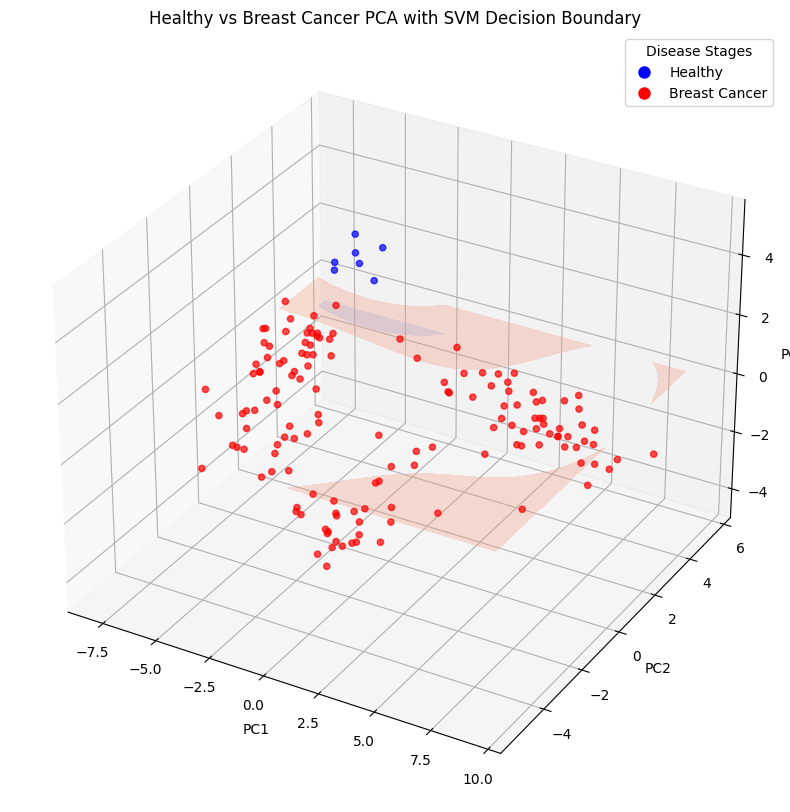

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming raw_data, metadata, and svm are already defined

# Standardize the data and apply log transformation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top50_data)  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create type labels (Healthy = 0, Breast Cancer = 1)
type_codes = [0 if t == 'Healthy' else 1 for t in metadata['type']]

# Train the SVM model (Soft SVM)
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(pca_result, type_codes)

# Get the SVM decision boundary
xx, yy = np.meshgrid(np.linspace(pca_result[:, 0].min(), pca_result[:, 0].max(), 50),
                     np.linspace(pca_result[:, 1].min(), pca_result[:, 1].max(), 50))

# Create a grid for prediction
grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())]  # Add z=0 initially (you can adjust this)

# Predict decision values for the grid points
Z = svm.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the SVM decision boundary (plane)
ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, cmap='coolwarm')

# Scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=type_codes, cmap='bwr', alpha=0.7)

# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Breast Cancer')
]

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Healthy vs Breast Cancer PCA with SVM Decision Boundary')

# Set custom axis limits (extend the limits here)
ax.set_xlim([pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1])  # Extend by 1 unit on both sides
ax.set_ylim([pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1])
ax.set_zlim([pca_result[:, 2].min() - 1, pca_result[:, 2].max() + 1])

# Add the legend
ax.legend(handles=handles, title="Disease Stages")

# Show the plot
plt.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Example: Replace with your actual data (X, y)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_classes=2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an SVM with a linear kernel
svm = SVC(kernel='linear', C=1.0)  # Linear kernel
svm.fit(X_scaled, y)

# Predictions and evaluation
y_pred = svm.predict(X_scaled)
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Get the coefficients (w) and intercept (b) of the hyperplane
w = svm.coef_[0]  # Weight vector
b = svm.intercept_[0]  # Bias term

# Function to plot the decision boundary
def plot_decision_boundary(X, y, svm, ax):
    h = .02  # Grid size for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get decision function values for each point in the grid
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary (where decision function = 0)
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, cmap='coolwarm')

    # Scatter plot with data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.7)

    # Plot the hyperplane (the decision boundary)
    ax.plot([-2, 2], [(-w[0] * (-2) - b) / w[1], (-w[0] * 2 - b) / w[1]], 'k--')

    # Labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Linear SVM - Decision Boundary')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X_scaled, y, svm, ax)

# Show the plot
plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

C:\Users\itani\AppData\Local\Temp\ipykernel_32480\1639968513.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['type'] = ['Healthy' if x == 'normal' else 'Breast Cancer' for x in metadata['type']]


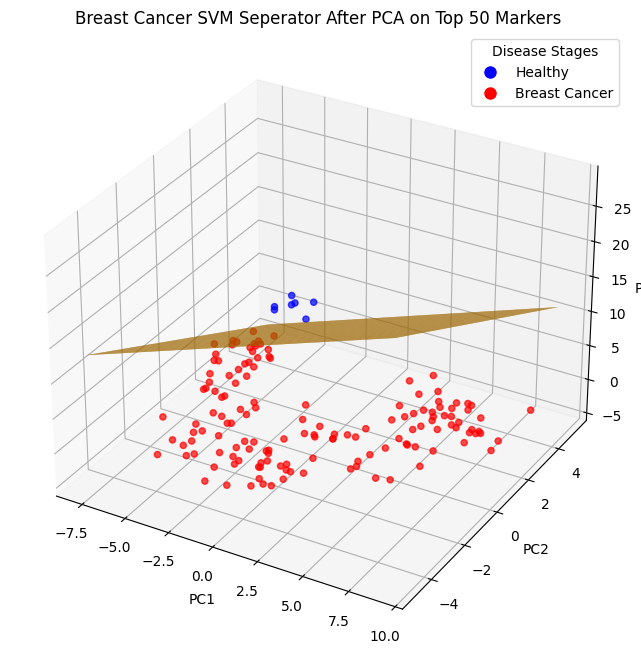

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       144

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151

Confusion Matrix:
 [[  7   0]
 [  0 144]]


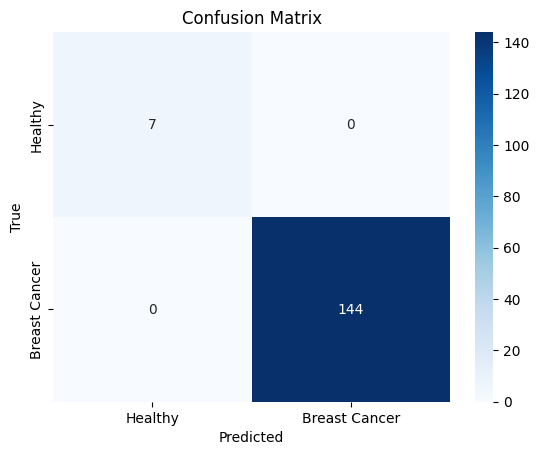

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assuming raw_data, metadata, and svm are already defined

raw_data = pd.read_csv("Breast_GSE45827.csv")
metadata = raw_data[['samples', 'type']]
data = raw_data.drop(['samples', 'type'], axis = 1)

top_50_genes = pd.read_csv('top_50_genes.csv')
top50_data = raw_data[top_50_genes['Gene']]

metadata['type'] = ['Healthy' if x == 'normal' else 'Breast Cancer' for x in metadata['type']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(top50_data)  # Log transformation to handle skewed data

# Apply PCA (reduce to 3 dimensions)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Convert PCA result into a DataFrame for easier handling
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Create type labels (Healthy = 0, Breast Cancer = 1)
type_codes = [0 if t == 'Healthy' else 1 for t in metadata['type']]

# Train the SVM model (Soft SVM)
svm = SVC(kernel='linear', C=0.5, gamma='scale')
svm.fit(pca_result, type_codes)

# Get the SVM decision boundary (hyperplane) in the original space
w = svm.coef_[0]  # The weight vector for linear SVM
b = svm.intercept_[0]-2.3 # The bias term

# Apply PCA transformation to the weight vector to project it to the PCA space
w_pca = pca.components_.T @ w  # Transform the weight vector into PCA space

# Create a meshgrid to plot the decision surface (hyperplane) in PCA space
xx, yy = np.meshgrid(np.linspace(pca_result[:, 0].min(), pca_result[:, 0].max(), 50),
                     np.linspace(pca_result[:, 1].min(), pca_result[:, 1].max(), 50))

# Compute the decision plane (hyperplane) in the 3D PCA space
zz = -(w_pca[0] * xx + w_pca[1] * yy + b) / w_pca[2]

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with PCA results
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                     c=type_codes, cmap='bwr', alpha=0.7)

# Plot the decision plane
ax.plot_surface(xx, yy, zz, color='orange', alpha=1)

# Create proxy artists for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Healthy'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Breast Cancer')
]

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Breast Cancer SVM Seperator After PCA on Top 50 Markers')

# Add the legend
ax.legend(handles=handles, title="Disease Stages")

# Show the plot
plt.show()

# Make predictions on the PCA-transformed data
y_pred = svm.predict(pca_result)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(type_codes, y_pred))
print("Confusion Matrix:\n", confusion_matrix(type_codes, y_pred))

# Plot confusion matrix
cm = confusion_matrix(type_codes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Breast Cancer'], yticklabels=['Healthy', 'Breast Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
